In [1]:
from ase.io import read, write
from ase import Atoms
from ase.visualize import view
import numpy as np
from mbpol_calculator import MbpolCalculator
import pandas as pd
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
atoms = read('hbond_start.traj','0')

pos = atoms.get_positions().round(3)

O = pos[3]

phi = - 109.47 /180 * np.pi / 2
R = np.array([[np.cos(phi),0,np.sin(phi)],
              [0,1,0],
              [-np.sin(phi),0,np.cos(phi)]])
pos[3:] = R.dot((pos[3:]-O).T).T + O

atoms.set_positions(pos)

In [3]:
oo = np.arange(2.75, 3.18, 0.03)
oh = np.arange(0.93,1.00, 0.004)
OO, OH = np.meshgrid(oo,oh)

In [4]:
mesh = []
for oo, oh in zip(OO.flatten(), OH.flatten()):
    new_atoms = Atoms(atoms)
    positions = new_atoms.get_positions()
    positions[1] = [0,0,oh]
    positions[3:,2] = [oo,oo + 0.583, oo + 0.583]
    new_atoms.set_positions(positions)
    mesh.append(new_atoms)

In [5]:
# pos = []
# for m in mesh:
#     pos.append(m.get_positions())

# pd.DataFrame(np.array(pos).reshape(-1,3)).to_csv('./energy_surface.csv', index = None, header = None)

In [6]:
energies = []
for m in mesh:
    energy = MbpolCalculator(m).get_potential_energy(m)
    energies.append(energy)

In [7]:
view(mesh)

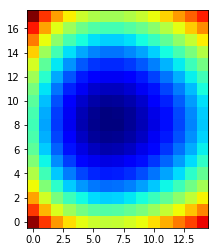

In [8]:
imshow(np.array(energies).reshape(OO.shape), origin='left', cmap='jet')

In [9]:
energies = np.array(energies).reshape(OO.shape)

In [10]:
def parabola(a, b, c, d, x0, y0):
    """Returns a gaussian function with the given parameters"""
    a = float(a)
    b = float(b)
    c = float(c)
    x0 = float(x0)
    y0 = float(y0)
    return lambda x,y: a*(x-x0)**2 + b*(y-y0)**2+ d*(x-x0)*(y-y0) + c
#     return lambda x,y: a*(x-x0)**2 + b*(y-y0)**2 + c

def fitparabola(data, params):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    
    errorfunction = lambda p: np.ravel(parabola(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

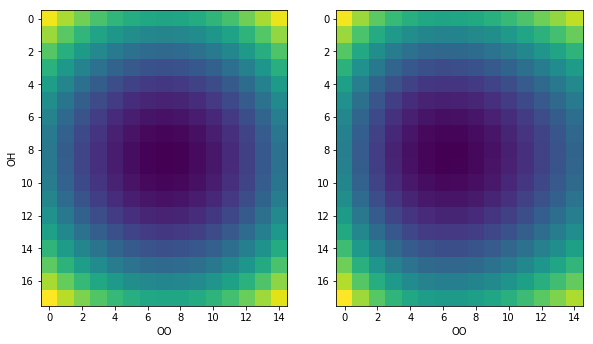

In [16]:
oo = np.arange(2.75, 3.18, 0.03)
oh = np.arange(0.93,1.00, 0.004)

params = 0,0,0,0, 0,0
params = fitparabola(energies, params)

figsize(15,6)
energies_fitted = parabola(*params)(*np.indices(energies.shape))
subplot(1,3,1)
imshow(energies_fitted)
xlabel('OO')
ylabel('OH')
# xticks(list(range(len(oo))[::2]),oo.round(2)[::2])
# yticks(list(range(len(oh))[1::2]),oh.round(2)[1::2])
subplot(1,3,2)
imshow(energies)
xlabel('OO')
# ylabel('OH')
# xticks(list(range(len(oo))[::2]),oo.round(2)[::2])
# yticks([])
# subplot(1,3,3)
# imshow(energies - energies_fitted)

# colorbar()
params/[0.004**2,0.03**2,1,0.03*0.004,1/0.004,1/0.03] + [0,0,0,0,0.93,2.75]
savefig('energy_surface.pdf')
# params

In [12]:
energies_pbe = np.genfromtxt('./e_surface_data/energies_siesta.dat').reshape(OO.shape)

array([ 2.60903298e+01,  4.51660194e-01, -9.39469194e+02,  1.06307019e-01,
        9.77362299e-01,  2.93189954e+00])

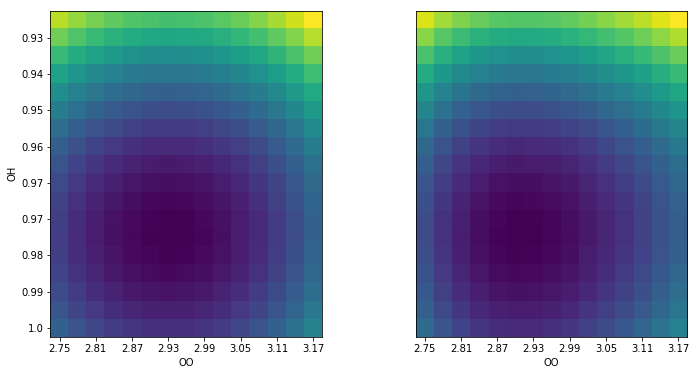

In [13]:

params =0,0,0,0,0,0
params = fitparabola(energies_pbe, params)

figsize(12,6)
energies_fitted = parabola(*params)(*np.indices(energies.shape))
subplot(1,2,1)
imshow(energies_fitted)
xlabel('OO')
ylabel('OH')
xticks(list(range(len(oo))[::2]),oo.round(2)[::2])
yticks(list(range(len(oh))[1::2]),oh.round(2)[1::2])

subplot(1,2,2)

xlabel('OO')
xticks(list(range(len(oo))[::2]),oo.round(2)[::2])
yticks([])
imshow(energies_pbe)

# subplot(1,3,3)
# imshow(energies_pbe-energies_fitted)
# colorbar()
# params
params/[0.004**2,0.03**2,1,0.03*0.004,1/0.004,1/0.03] + [0,0,0,0,0.93,2.75]